# Treadmill Buyer Profile
source: https://platform.stratascratch.com/data-projects/treadmill-buyer-profile

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### (1) Load data

In [2]:
buyerprofile = pd.read_csv("./datasets/aerofit_treadmill_data.csv")

In [3]:
buyerprofile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


### (2) EDA

#### Numerical distribution

In [4]:
buyerprofile.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


#### Categorical values

In [5]:
catvars = buyerprofile.select_dtypes(include="object").columns.tolist()

for i in catvars:
    print(f"{i}: {buyerprofile[i].nunique()}: {buyerprofile[i].unique()}")

Product: 3: ['KP281' 'KP481' 'KP781']
Gender: 2: ['Male' 'Female']
MaritalStatus: 2: ['Single' 'Partnered']


#### Patterns of missing
No missing detected

In [6]:
buyerprofile.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

#### Visualization

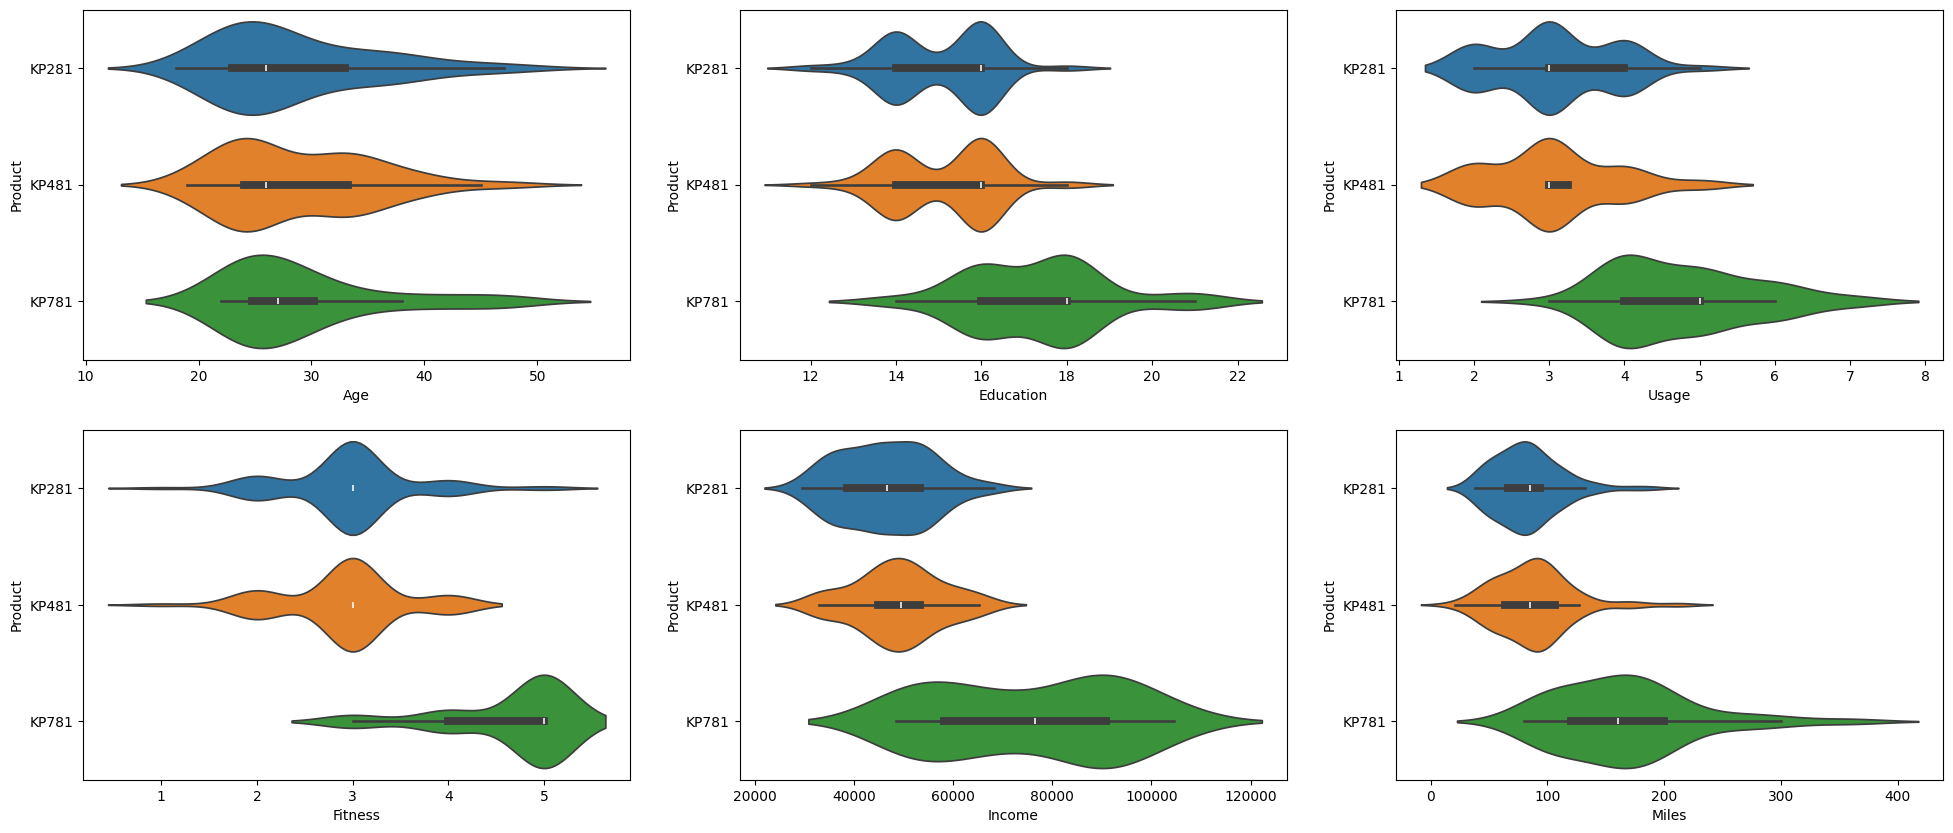

In [7]:
numvars = buyerprofile.select_dtypes("number").columns.tolist()

plot, ax = plt.subplots(nrows=2, ncols=3, figsize=(24, 10))
ax = ax.flatten()

for i, cvar in enumerate(numvars):
    sns.violinplot(data=buyerprofile, y="Product", x=cvar, ax=ax[i], hue="Product")

for j in range(i + 1, len(ax)):
    ax[j].set_visible(False)

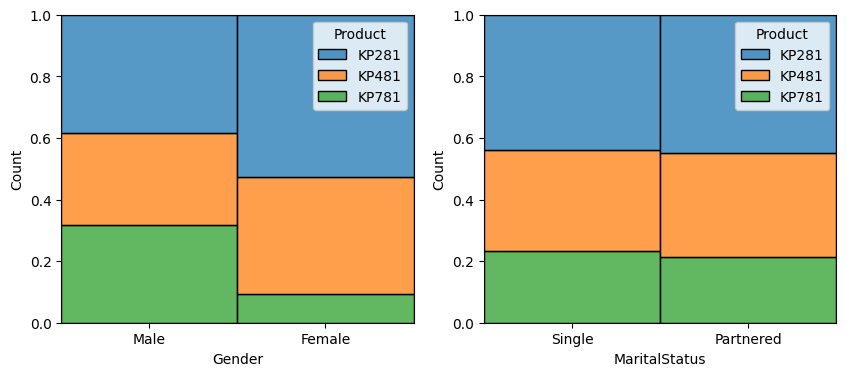

In [8]:
plot, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
ax = ax.flatten()

for i, cvar in enumerate(["Gender", "MaritalStatus"]):
    sns.histplot(data=buyerprofile, x=cvar, ax=ax[i], hue="Product", multiple="fill")

### (3) Contigent tables
Overall 44% of the customer purchase the entry-level product KP281

33% of the customer purchase the mid-level product KP481

22% of the customer purchase the advanced product KP781 

In [9]:
buyerprofile.Product.value_counts(normalize=True)

Product
KP281    0.444444
KP481    0.333333
KP781    0.222222
Name: proportion, dtype: float64

In [ ]:
def prob_by_varx(varx):
    x = pd.crosstab(
        buyerprofile.Product, buyerprofile[varx], margins=True, normalize="index"
    ).reset_index()
    return

#### Gender
42% of the customers are female and 58% of the customers are male

For KP781, customers are more like to be male (83%) than female (18%)
 

In [11]:
prob_by_varx("Gender")

Gender,Product,Female,Male
0,KP281,0.500000,0.500000
1,KP481,0.483333,0.516667
2,KP781,0.175000,0.825000
3,All,0.422222,0.577778


#### MaritalStatus

41% of the customers are single; 59% of the customers are partnered.
There is no significant difference in the pattern of purchase between single and partnered customers

In [12]:
prob_by_varx("MaritalStatus")

MaritalStatus,Product,Partnered,Single
0,KP281,0.600000,0.400000
1,KP481,0.600000,0.400000
2,KP781,0.575000,0.425000
3,All,0.594444,0.405556


#### Usage

Customers who purchase KP781 are expected to use the treadmill more, 75% would use more than 3-5 times per week,  23% would use more than 5 times per week

In [ ]:
buyerprofile["Usage_cat"] = pd.cut(
    buyerprofile.Usage, [2, 3, 5, 7], right=True, include_lowest=True
)
prob_by_varx("Usage_cat")

Usage_cat,Product,"(1.999, 3.0]","(3.0, 5.0]","(5.0, 7.0]"
0,KP281,0.700000,0.300000,0.000
1,KP481,0.750000,0.250000,0.000
2,KP781,0.025000,0.750000,0.225
3,All,0.566667,0.383333,0.050


#### Fitness
Customers who purchase KP781 are more likely in good shape. 73% are in excellent shape (=5)

In [33]:
prob_by_varx("Fitness")

Fitness,Product,1,2,3,4,5
0,KP281,0.012500,0.175000,0.675000,0.112500,0.025000
1,KP481,0.016667,0.200000,0.650000,0.133333,0.000000
2,KP781,0.000000,0.000000,0.100000,0.175000,0.725000
3,All,0.011111,0.144444,0.538889,0.133333,0.172222


#### Income
Customers who purchase KP781 are more likely to have higher income. 73% of the customer earn more than 60K, compared to only 8% for customer who purchased KP281 and 12% for customer who purchased KP481

In [43]:
buyerprofile["Income_cat"] = pd.cut(
    buyerprofile.Income, [20000, 40000, 60000, 120000], right=True, include_lowest=True
)
prob_by_varx("Income_cat")

Income_cat,Product,"(19999.999, 40000.0]","(40000.0, 60000.0]","(60000.0, 120000.0]"
0,KP281,0.287500,0.637500,0.075000
1,KP481,0.150000,0.733333,0.116667
2,KP781,0.000000,0.275000,0.725000
3,All,0.177778,0.588889,0.233333


#### Miles

Customers who purchase KP781 are expected to run/walk more than customers who purchased the other two models. 80% of the customer who purchased KP781 would run more than 100 miles per week, whereas less than 30% of the custmers who purchased KP481 or KP281 would run more than 100 miles per week

In [49]:
buyerprofile["Miles_cat"] = pd.cut(
    buyerprofile.Miles, [0, 100, 200, 500], right=True, include_lowest=True
)
prob_by_varx("Miles_cat")

Miles_cat,Product,"(-0.001, 100.0]","(100.0, 200.0]","(200.0, 500.0]"
0,KP281,0.775000,0.225000,0.000000
1,KP481,0.733333,0.250000,0.016667
2,KP781,0.200000,0.675000,0.125000
3,All,0.633333,0.333333,0.033333


#### Education

Customers who purchased KP781 are more likely to have a longer years in education. 58% of KP781 customers have more than 16 years of education, whereas less than 5% of KP481 or KP281 customers have more than 16+ years of education

In [51]:
buyerprofile["Edu_cat"] = pd.cut(
    buyerprofile.Education, [0, 12, 16, 20, 30], right=True, include_lowest=True
)
prob_by_varx("Edu_cat")

Edu_cat,Product,"(-0.001, 12.0]","(12.0, 16.0]","(16.0, 20.0]","(20.0, 30.0]"
0,KP281,0.025000,0.950000,0.025000,0.000000
1,KP481,0.016667,0.950000,0.033333,0.000000
2,KP781,0.000000,0.425000,0.500000,0.075000
3,All,0.016667,0.833333,0.133333,0.016667
